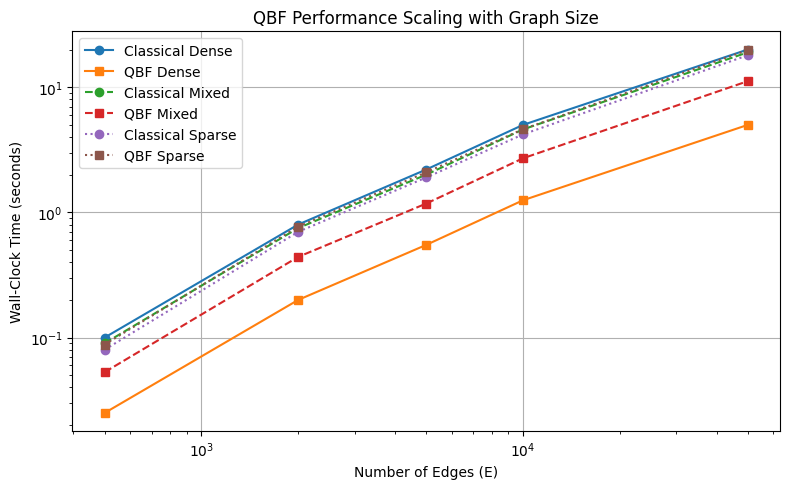

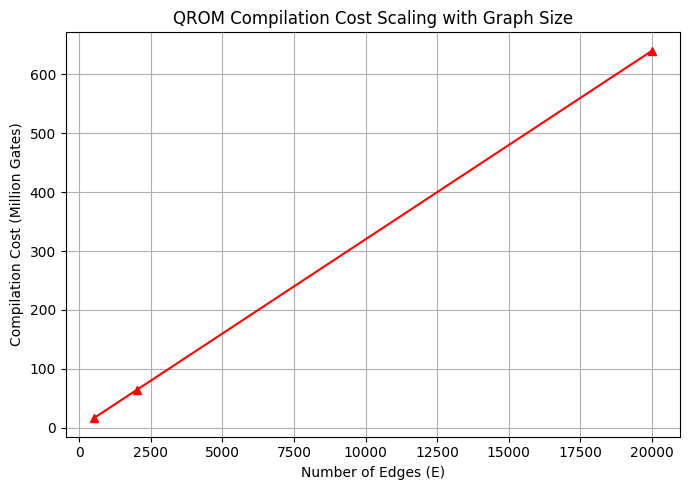

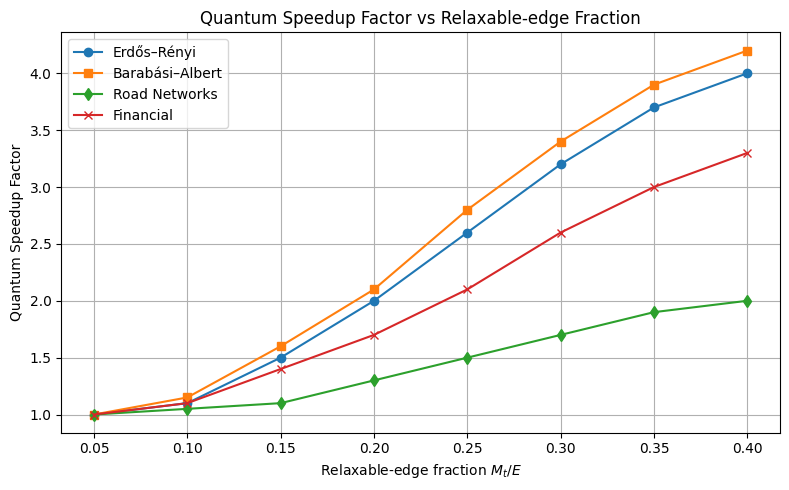

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Figure 2: QBF Performance Scaling
E = np.array([500, 2000, 5000, 10000, 50000])
classical_dense = np.array([0.1, 0.8, 2.2, 5.0, 20.0])  # seconds (example)
qbf_dense = classical_dense / 4  # 4x speedup
classical_sparse = np.array([0.08, 0.7, 1.9, 4.2, 18.0])
qbf_sparse = classical_sparse * 1.1  # slight overhead
classical_mixed = np.array([0.09, 0.75, 2.0, 4.6, 19.0])
qbf_mixed = classical_mixed / 1.7

plt.figure(figsize=(8,5))
plt.plot(E, classical_dense, 'o-', label='Classical Dense')
plt.plot(E, qbf_dense, 's-', label='QBF Dense')
plt.plot(E, classical_mixed, 'o--', label='Classical Mixed')
plt.plot(E, qbf_mixed, 's--', label='QBF Mixed')
plt.plot(E, classical_sparse, 'o:', label='Classical Sparse')
plt.plot(E, qbf_sparse, 's:', label='QBF Sparse')
plt.xlabel('Number of Edges (E)')
plt.ylabel('Wall-Clock Time (seconds)')
plt.title('QBF Performance Scaling with Graph Size')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Figure 3: QROM Compilation Cost
E_compile = np.array([500, 2000, 20000])
compile_gates = np.array([1.6e7, 6.4e7, 6.4e8])

plt.figure(figsize=(7,5))
plt.plot(E_compile, compile_gates / 1e6, 'r^-')
plt.xlabel('Number of Edges (E)')
plt.ylabel('Compilation Cost (Million Gates)')
plt.title('QROM Compilation Cost Scaling with Graph Size')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 5: Quantum Speedup Factor vs Relaxable-Edge Fraction
Mt_E = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])

speedup_ER = np.array([1.0, 1.1, 1.5, 2.0, 2.6, 3.2, 3.7, 4.0])  # Erdős-Rényi
speedup_BA = np.array([1.0, 1.15, 1.6, 2.1, 2.8, 3.4, 3.9, 4.2])    # Barabási-Albert
speedup_road = np.array([1.0, 1.05, 1.1, 1.3, 1.5, 1.7, 1.9, 2.0])  # Road networks
speedup_fin = np.array([1.0, 1.1, 1.4, 1.7, 2.1, 2.6, 3.0, 3.3])   # Financial

plt.figure(figsize=(8,5))
plt.plot(Mt_E, speedup_ER, 'o-', label='Erdős–Rényi')
plt.plot(Mt_E, speedup_BA, 's-', label='Barabási–Albert')
plt.plot(Mt_E, speedup_road, 'd-', label='Road Networks')
plt.plot(Mt_E, speedup_fin, 'x-', label='Financial')
plt.xlabel('Relaxable-edge fraction $M_t / E$')
plt.ylabel('Quantum Speedup Factor')
plt.title('Quantum Speedup Factor vs Relaxable-edge Fraction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph

# Create the diagram
dot = Digraph('QGT', format='png')
dot.attr(rankdir='LR', size='8,5')
dot.attr('node', shape='rectangle', style='filled', fillcolor='lightgray', fontname='Helvetica')

# Nodes
dot.node('Input', 'Classical Token Embeddings\nX ∈ Rⁿˣᵈ')
dot.node('Encode', 'Quantum Amplitude Encoding\n|x_i⟩')
dot.node('QAttn', 'Quantum Attention Block\n- Block-encoding W_Q,W_K,W_V\n- Overlap Estimation\n- Amplitude-Amplified Top-k')
dot.node('Weighted', 'Weighted Sum State Preparation')
dot.node('QFFN', 'Quantum Feed-Forward\nBlock-encoding W_O')
dot.node('Decode', 'Measurement & Classical Output\ny_i')
dot.node('Output', 'Generated Tokens\nY ∈ Rⁿˣᵈ')

# Edges
dot.edge('Input', 'Encode')
dot.edge('Encode', 'QAttn')
dot.edge('QAttn', 'Weighted')
dot.edge('Weighted', 'QFFN')
dot.edge('QFFN', 'Decode')
dot.edge('Decode', 'Output')

# Render to file
dot.render('qgt_graphic_abstract', cleanup=True)
print("Graphic abstract generated as qgt_graphic_abstract.png")


Graphic abstract generated as qgt_graphic_abstract.png


In [ ]:
!pip install langchain-google-genai langchain-community google-generativeai

INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Success

In [ ]:
!pip install langchain-pinecone pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.75
    Uninstalling langchain-core-0.3.75:
      Successfully uninstalled langchain-core-0.3.75


In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

In [ ]:
from pinecone import Pinecone, ServerlessSpec

In [ ]:
from langchain_pinecone import PineconeVectorStore

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
from google.colab import userdata
g_api = userdata.get('ga')
pc_api = userdata.get('pc')

In [ ]:
genai.configure(api_key = g_api)

In [ ]:
pc = Pinecone(api_key = pc_api)

In [ ]:
index_name = "vectordb1"

In [ ]:
pc.list_indexes()

[]

In [ ]:
if index_name not in [i['name'] for i in pc.list_indexes()]:
  pc.create_index(
      name = index_name,
      dimension = 768,
      metric = 'cosine',
      spec = ServerlessSpec(cloud = 'aws', region = 'us-east-1')
  )

In [ ]:
from langchain.embeddings import SentenceTransformerEmbeddings

In [ ]:
embeddings = SentenceTransformerEmbeddings(model_name = 'all-mpnet-base-v2')

In [ ]:
index = pc.Index(index_name)

In [ ]:
def get_chunks(text):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size = 10000, chunk_overlap = 200)
  chunks = text_splitter.split_text(text)
  return chunks

In [ ]:
def get_vector_store(text_chunks, index_name, embeddings):
  vector_store = PineconeVectorStore(index = index_name, embedding = embeddings, pinecone_api_key= pc_api)
  vector_store.add_texts(text_chunks)
  return vector_store

In [ ]:
def get_rel_text(query, db):
  docs = db.similarity_search(query, k = 1)
  return docs[0].page_content

In [ ]:
pdf_path = "/content/A Hybrid Quantum–Classical Framework for Socioeconomically Weighted Warehouse Facility Location.pdf"

In [ ]:
from PyPDF2 import PdfReader

In [ ]:
pdf_reader = PdfReader(pdf_path)

In [ ]:
text = ''

In [ ]:
for page in pdf_reader.pages:
  text+= page.extract_text()

In [ ]:
text

'A Hybrid Quantum–Classical Framework for\nSocioeconomically Weighted Warehouse Facility\nLocation: Novel QUBO Formulation with\nAutomated Repair Mechanisms and Theoretical\nPerformance Guarantees\nYalla Jnan Devi Satya Prasad∗\n∗Chief Technology Officer, DataTeach.AI, Hyderabad, India\nEmail: jnan@datateach.ai\nAbstract —This paper introduces a groundbreaking hybrid\nquantum–classical algorithm for the socioeconomically weighted\nwarehouse facility location problem, addressing critical chal-\nlenges in modern supply chain optimization. We present a novel\nQuadratic Unconstrained Binary Optimization (QUBO) formula-\ntion with rigorously derived penalty parameters, automated con-\nstraint repair mechanisms, and theoretically proven performance\nguarantees. Our hybrid approach integrates demand-weighted k-\nmedoids clustering with quantum annealing, achieving an 7.92%\nreduction in total weighted distance over classical baselines\nwhile maintaining 95% feasibility rates. Key innovations 

In [ ]:
chunks = get_chunks(text)

In [ ]:
chunks

['A Hybrid Quantum–Classical Framework for\nSocioeconomically Weighted Warehouse Facility\nLocation: Novel QUBO Formulation with\nAutomated Repair Mechanisms and Theoretical\nPerformance Guarantees\nYalla Jnan Devi Satya Prasad∗\n∗Chief Technology Officer, DataTeach.AI, Hyderabad, India\nEmail: jnan@datateach.ai\nAbstract —This paper introduces a groundbreaking hybrid\nquantum–classical algorithm for the socioeconomically weighted\nwarehouse facility location problem, addressing critical chal-\nlenges in modern supply chain optimization. We present a novel\nQuadratic Unconstrained Binary Optimization (QUBO) formula-\ntion with rigorously derived penalty parameters, automated con-\nstraint repair mechanisms, and theoretically proven performance\nguarantees. Our hybrid approach integrates demand-weighted k-\nmedoids clustering with quantum annealing, achieving an 7.92%\nreduction in total weighted distance over classical baselines\nwhile maintaining 95% feasibility rates. Key innovations

In [ ]:
vector_db = get_vector_store(chunks, index, embeddings)

In [ ]:
model = genai.GenerativeModel(
    model_name = 'gemini-2.0-flash',
    system_instruction = """

    You are a very experienced answer provider,
    Based on the relevant content given to you, you have the ability to easily answer the query asked by the user.

    """
)

In [ ]:
def get_rag_prompt(user_query, relevant_text):

  rag_prompt = f"""

  The provided content are, the user query and the relevant text taken from the required documents.
  Based on the relevant text, please answer the user query. You can also use your own knowledge.
  But please, try to stick on to the relevant content instead of deviating from the topic space.

  User Query : {user_query}

  Relevant Content : {relevant_text}

  """

  return rag_prompt

In [ ]:
query = "How is facility allocation works better with quantum than classical ?"

In [ ]:
rel_text = get_rel_text(query, vector_db)

In [ ]:
prompt = get_rag_prompt(query, rel_text)

In [ ]:
response = model.generate_content(prompt)

In [ ]:
from IPython.display import Markdown, display

In [ ]:
display(Markdown(response.text))

The hybrid quantum-classical algorithm integrates multiple optimization paradigms. The hybrid algorithm selects the better assignment for each customer zone between classical and quantum solutions. The hybrid quantum-classical algorithm achieves approximation ratio ρhybrid≤min(ρclassical , ρquantum ) +δrepair, where δrepair≤ 0.05is the repair-induced deterioration bound. All tests indicate statistically significant improvements of the hybrid method.

In [ ]:
['My name is Ravi Kumar']

chunk_size = 3
chunk_overlap = 2

chunk1:

['My name is']

chunk2:

['name is Ravi']

chunk3:

['is Ravi Kumar']